                                        INTRODUCTION
My name is BADMUS HABEEB MUSTAPHA i am a data scientist and a biologist. i choose this project because of my interest in Biostatistics and Public health analysis, i love good wine and that got my interest in this project. I can confidently say that with my analytical skills, I can manipulate data using tools like Excel, SQL, Power BI, Python and R to gain insightful decisions. With the task  of completing the Data Analytics course at SeedBuilders Academy, the task  is to use the datasets made available to analyze,make prediction and  to visualize the data. With these, I will be introducing my 
Spanish wine project at SeedBuilders.
 Spanish wine is dated back around 1100BC When Phoenicians founded the trading post of cadiz in southwestern spain,though many archeologists believe that grapes were first cultivated sometimes between 4000 and 3000 BC, much before the wine-growing culture of the PHOENICIANS.
 Whats makes spanish wine unique is that they are made in a range of styles that reflect the country's diverse regions and native grape varieties.offering the consumers a unique and authentic experience with each wine.


### Dataset Description
#### Context
This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

#### Content
The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. 

#### Attribute Information
* **winery**: Winery name
* **wine**: Name of the wine
* **year**: Year in which the grapes were harvested
* **rating**: Average rating given to the wine by the users *[from 1-5]*
* **num_reviews**: Number of users that reviewed the wine
* **country**: Country of origin *[Spain]*
* **region**: Region of the wine
* **price**: Price in euros *[€]*
* **type**: Wine variety
* **body**: Body score, defined as the richness and weight of the wine in your mouth *[from 1-5]*
* **acidity**: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip *[from 1-5]*

IMPORTING AND DATA PROCESSING.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
SP = pd.read_csv('wines_SPA.csv')
SP.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
SP=SP.replace('N.V.', 'NaN')

In [6]:
SP.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [7]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [8]:
SP['year']=pd.to_datetime(SP['year'])

In [9]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   winery       7500 non-null   object        
 1   wine         7500 non-null   object        
 2   year         7210 non-null   datetime64[ns]
 3   rating       7500 non-null   float64       
 4   num_reviews  7500 non-null   int64         
 5   country      7500 non-null   object        
 6   region       7500 non-null   object        
 7   price        7500 non-null   float64       
 8   type         6955 non-null   object        
 9   body         6331 non-null   float64       
 10  acidity      6331 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 644.7+ KB


In [10]:
SP['year']=SP['year'].dt.year

VISUALIZATION

Pair plot rating

sns.pairplot(SP,hue='rating')

Correlation heat map

<AxesSubplot:>

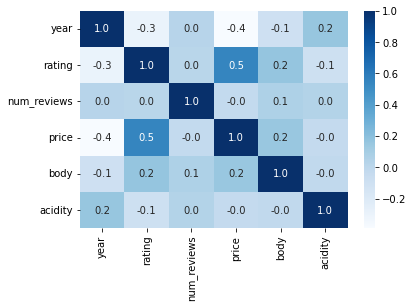

In [11]:
sns.heatmap(SP.corr(),annot=True, cmap='Blues', fmt='.1f')

 Scatterplot with 'Year', 'Price', 'Rating' and 'Number of Review'

<AxesSubplot:xlabel='year', ylabel='price'>

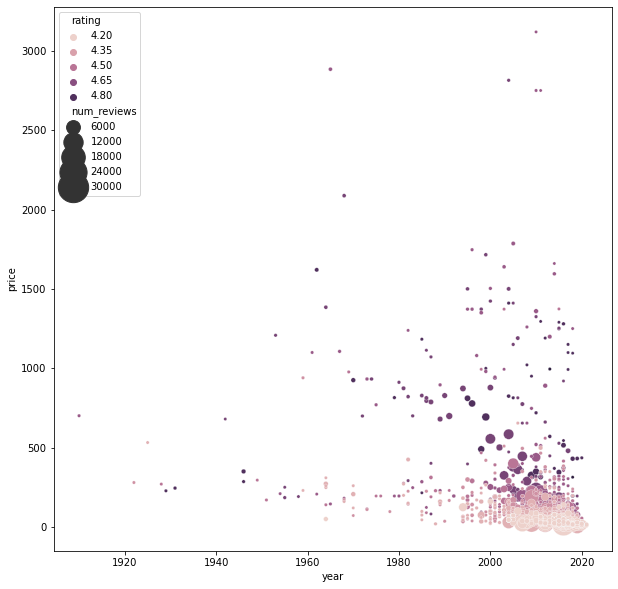

In [12]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=SP, x='year', y='price',hue='rating',size='num_reviews',sizes=(10,1000))

* Scatterplot with 'Body', 'Acidity', 'Rating' and 'Price'

<AxesSubplot:xlabel='body', ylabel='acidity'>

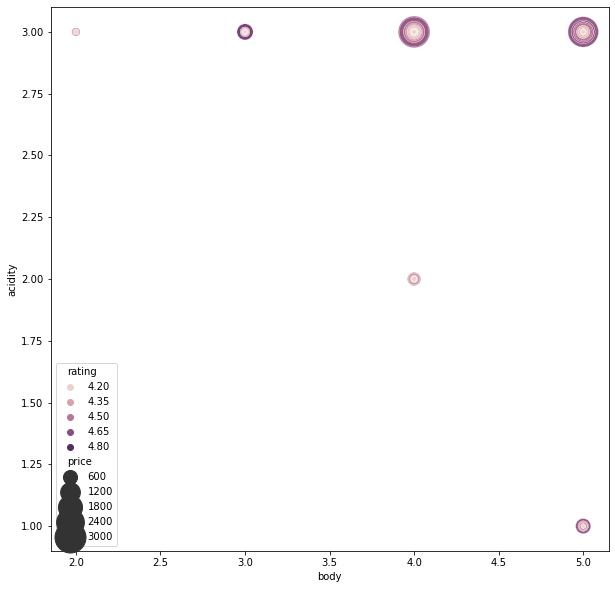

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=SP, x='body', y='acidity',hue='rating',size='price',sizes=(10,1000))

* Boxplot: Rating and Price


<AxesSubplot:xlabel='rating', ylabel='price'>

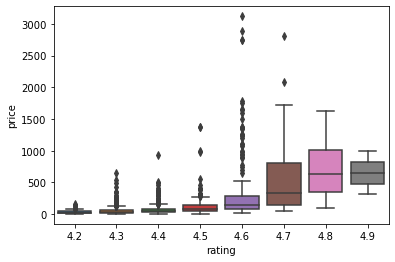

In [14]:
sns.boxplot(x=SP["rating"],y=SP['price'])

* Boxplot: Rating and Number of Review

<AxesSubplot:xlabel='rating', ylabel='num_reviews'>

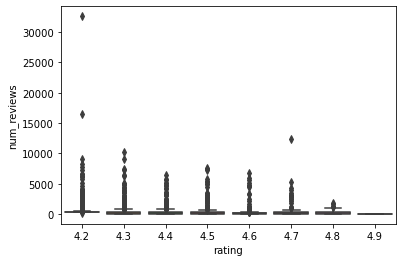

In [15]:
sns.boxplot(x=SP["rating"],y=SP['num_reviews'])

* Boxplot: Rating and Body

<AxesSubplot:xlabel='rating', ylabel='body'>

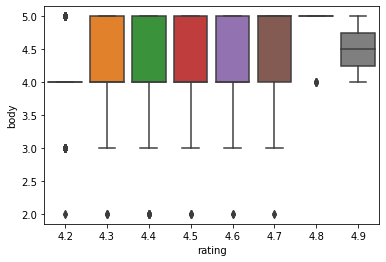

In [16]:
sns.boxplot(x=SP["rating"],y=SP['body'])

* Boxplot: Rating and Acidity

<AxesSubplot:xlabel='rating', ylabel='acidity'>

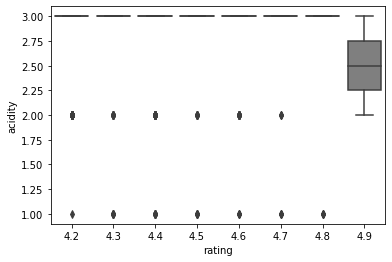

In [17]:
sns.boxplot(x=SP["rating"],y=SP['acidity'])

* Barchart : Top 30 winery by average price

<AxesSubplot:xlabel='winery'>

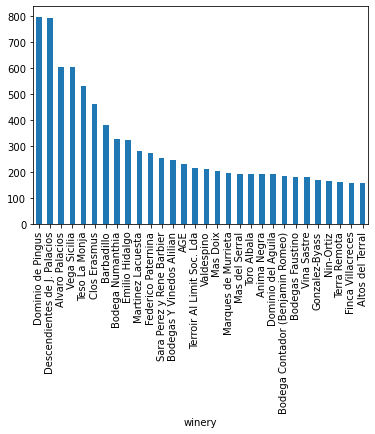

In [18]:
SP.groupby('winery')['price'].mean().sort_values(ascending=False).head(30).plot.bar()

<AxesSubplot:>

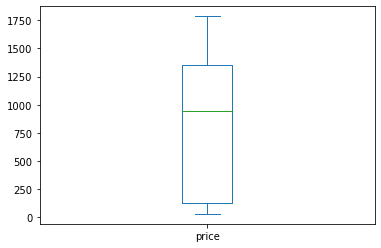

In [19]:
#Price range of 'Dominio de Pingus' ( Highest average price winery )
SP_Dominio_de_Pingus=SP[SP['winery']=='Dominio de Pingus']
SP_Dominio_de_Pingus['price'].plot.box()

<AxesSubplot:xlabel='winery'>

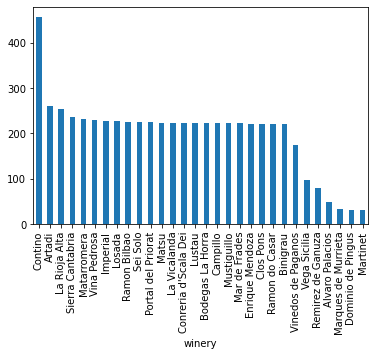

In [20]:
#Barchart : Top 20 winery by total number of wines
SP.groupby('winery')['wine'].count().sort_values(ascending=False).head(30).plot.bar()

<AxesSubplot:>

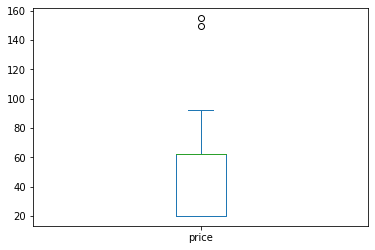

In [21]:
#Price range of 'Contino' ( Largest number of wines)
SP_Contino=SP[SP['winery']=='Contino']
SP_Contino['price'].plot.box()

<AxesSubplot:xlabel='region'>

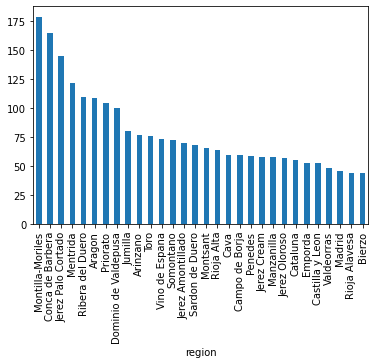

In [22]:
#Barchart : Top 20 regions by average price
SP.groupby('region')['price'].mean().sort_values(ascending=False).head(30).plot.bar()

<AxesSubplot:>

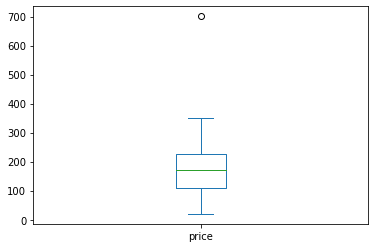

In [23]:
#Price range of 'Montilla-Moriles' ( Highest average price region )
SP_Montilla_Moriles=SP[SP['region']=="Montilla-Moriles"]
SP_Montilla_Moriles['price'].plot.box()

<AxesSubplot:xlabel='type'>

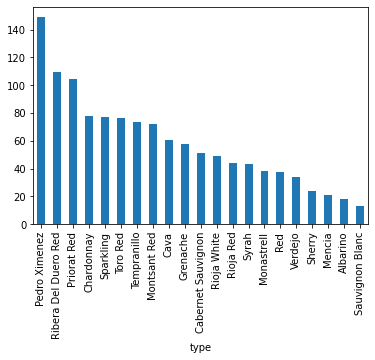

In [24]:
#Barchart : Top 20 typess by average price
SP.groupby('type')['price'].mean().sort_values(ascending=False).head(30).plot.bar()

<AxesSubplot:>

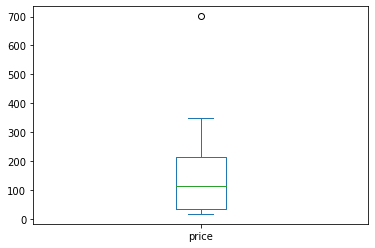

In [25]:
#Price range of 'Pedro Ximenez' ( Highest average price type )
SP_Pedro_Ximenez=SP[SP['type']=="Pedro Ximenez"]
SP_Pedro_Ximenez['price'].plot.box()

*CLUSTERING

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
SP1=SP.dropna()

In [29]:
SP2=SP1.drop(['num_reviews','winery','wine','country','region','type'],axis=1)

In [30]:
SP2 = scaler.fit_transform(SP2)

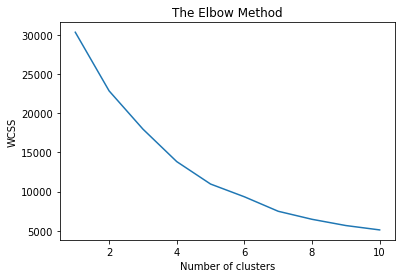

In [31]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  #Test 1 to 10 differnt clusters
#Loop over the indented statements 10 times to see how distance reduces till it becomes steady 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(SP2)  #Train the model for all the 10 clusters and append into wcss list
    
    '''kmeans.fit(X) generates the following parameters:
    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)
    inertia: Sum of squared distances of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) #Add each Sum of squared distances to wcss[] list
    
plt.plot(range(1, 11), wcss) # plot the ten different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(SP2)

In [48]:
labels = kmeans_model.labels_
labels

array([1, 2, 1, ..., 0, 3, 3])

In [50]:
color_codes = {0:'green', 1:'blue', 2:'yellow',3:'black'}
colors = [color_codes[x] for x in labels]

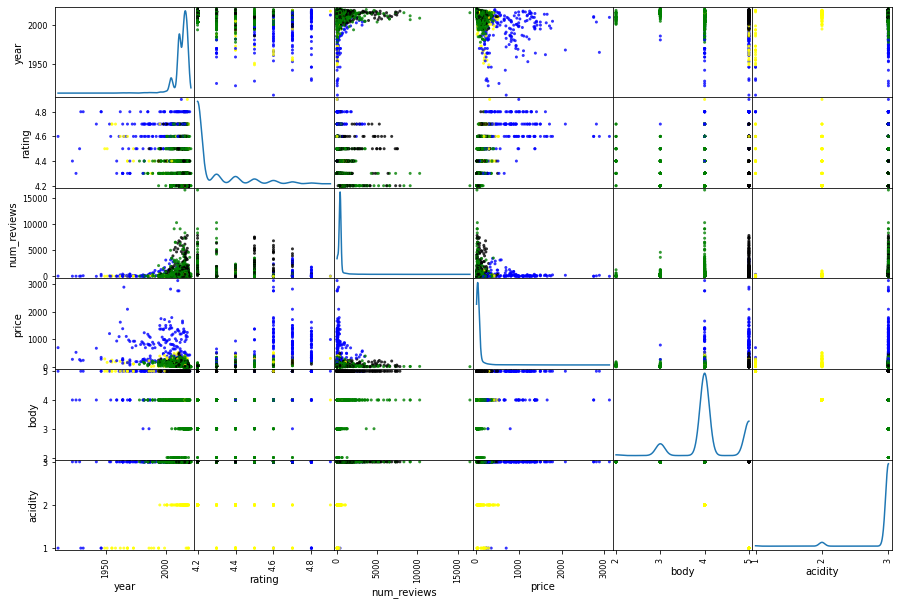

In [51]:
pd.plotting.scatter_matrix(SP1[SP1.columns[0:]], figsize=(15,10), color=colors, alpha=0.8, diagonal='kde')
plt.show()

In [52]:
SP1['Cluster']=labels
SP1.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,Cluster
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,1
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,1
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,1
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,1


<AxesSubplot:ylabel='Cluster'>

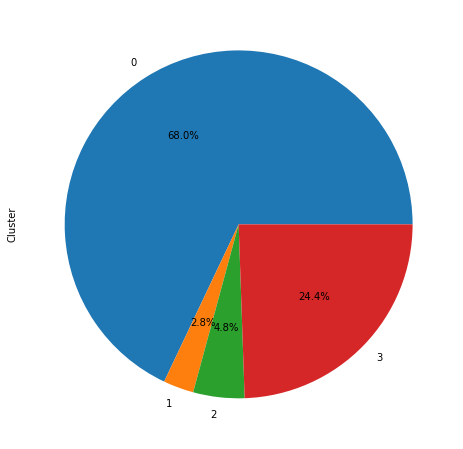

In [54]:
SP1.groupby('Cluster')['Cluster'].count().plot.pie(autopct="%1.1f%%",figsize=(8,8))

clusters 0 occupies 68%, 
cluster 1 ,2 and 3 occupies 2.8% , 4.8% and 24.4% respectively.

In [56]:
SP1['Cluster']=labels
SP1.groupby('Cluster').describe().T

Cluster                       0            1            2            3
year        count   4125.000000   172.000000   289.000000  1484.000000
            mean    2013.369212  1992.058140  2012.557093  2014.303908
            std        4.665085    22.031001    11.544796     3.686459
            min     1978.000000  1910.000000  1949.000000  1986.000000
            25%     2011.000000  1981.000000  2016.000000  2011.000000
            50%     2015.000000  1999.000000  2016.000000  2015.000000
            75%     2017.000000  2009.000000  2016.000000  2016.000000
            max     2021.000000  2020.000000  2019.000000  2020.000000
rating      count   4125.000000   172.000000   289.000000  1484.000000
            mean       4.239006     4.644186     4.281661     4.270081
            std        0.090550     0.139845     0.141578     0.128772
            min        4.200000     4.300000     4.200000     4.200000
            25%        4.200000     4.600000     4.200000     4.200000
            50%        4.200000     4.700000     4.200000     4.200000
            75%        4.200000     4.700000     4.400000     4.300000
            max        4.800000     4.900000     4.900000     4.800000
num_reviews count   4125.000000   172.000000   289.000000  1484.000000
            mean     420.607758   324.494186   320.660900   530.799191
            std      528.392821   614.518235   153.553994   812.477110
            min       25.000000    25.000000    25.000000    25.000000
            25%      390.000000    55.500000   174.000000   388.000000
            50%      410.000000   103.000000   398.000000   400.000000
            75%      420.000000   260.500000   398.000000   412.000000
            max    16505.000000  3437.000000  1064.000000  7825.000000
price       count   4125.000000   172.000000   289.000000  1484.000000
            mean      40.181312   815.206163    78.928976    54.130840
            std       38.861596   568.781802    84.224093    45.934761
            min        6.260000    72.000000     9.884034     7.900000
            25%       17.900000   349.750000    48.960000    31.630000
            50%       24.450000   758.535000    48.960000    37.900000
            75%       49.000000  1122.400000    48.960000    64.500000
            max      415.000000  3119.080000   519.550000   498.614195
body        count   4125.000000   172.000000   289.000000  1484.000000
            mean       3.849939     4.622093     4.076125     5.000000
            std        0.379555     0.509765     0.265657     0.000000
            min        2.000000     3.000000     4.000000     5.000000
            25%        4.000000     4.000000     4.000000     5.000000
            50%        4.000000     5.000000     4.000000     5.000000
            75%        4.000000     5.000000     4.000000     5.000000
            max        4.000000     5.000000     5.000000     5.000000
acidity     count   4125.000000   172.000000   289.000000  1484.000000
            mean       3.000000     2.941860     1.923875     3.000000
            std        0.000000     0.336985     0.265657     0.000000
            min        3.000000     1.000000     1.000000     3.000000
            25%        3.000000     3.000000     2.000000     3.000000
            50%        3.000000     3.000000     2.000000     3.000000
            75%        3.000000     3.000000     2.000000     3.000000
            max        3.000000     3.000000     2.000000     3.000000

There are large gap in mean,minimum and maximum price among clusters. It could be that clustering mainly depends on price. Wines in cluster 1 have a high price range and cluster 0 has the lowest price range.

So I tried finding where wines in cluster 1 and 0 are made. Are there any common features in wineries, regions or types?

<AxesSubplot:xlabel='region'>

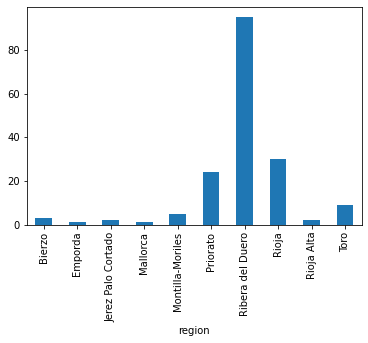

In [60]:
SP1[SP1['Cluster']==1].groupby('region')['wine'].count().plot.bar()

The region Ribera del Duero in cluster 1 has the highest price. its could be, because of the quality of the wine

<AxesSubplot:xlabel='region'>

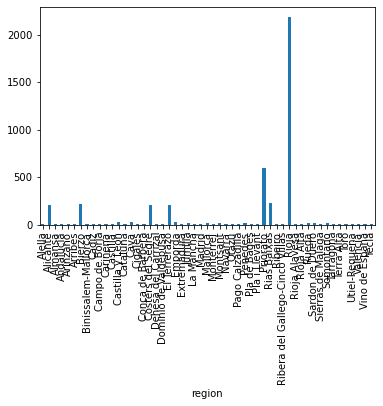

In [62]:
SP1[SP1['Cluster']==0].groupby('region')['wine'].count().plot.bar()

Region Rioja has the higest price in cluster 0 which has the lowest price among the clusters. the reason for the low price might be due to the quality of the wine.

PRINCIPAL COMPONENT ANALYSIS (PCA)

In [63]:
SP2=pd.DataFrame(SP2)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

X = pca.fit_transform(SP2.values)
embed2 = pd.DataFrame(X)
embed2["Cluster"] = SP1["Cluster"]                 
embed2.head() 

,0,1,2,3,Cluster
0,6.554405,-2.076827,1.071667,-3.219830,1.0
1,3.993797,2.569449,-0.195788,-4.365281,2.0
2,3.974195,-1.308211,0.001961,-1.732562,1.0
3,5.971072,-1.285683,0.662426,-0.948101,1.0
4,6.479656,-1.257865,0.823299,-0.688428,1.0


<AxesSubplot:xlabel='0', ylabel='1'>

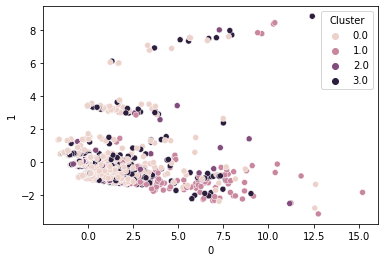

In [65]:
sns.scatterplot(data=embed2, x=0, y=1,hue="Cluster")

<AxesSubplot:>

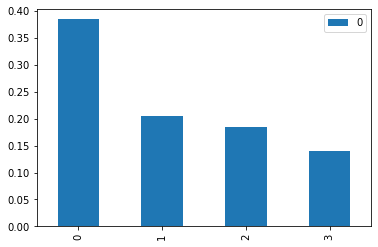

In [66]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

PC 0 to 3 explains almost over 90%.

CONCLUSION

From the clustering i was able to find out that the clustering depends on the price of the wine and wine are expensive in cluster 1 which happens to be Northern part of spain and the lowest price is in the cluster 0. the clustering perform almost 90%.
the high price of the wine in cluster 1 could be due to the quality of the wine.